# Pytania z lekcji 4

W tym zestawie pytań będziemy używać zbioru danych części największych spółek publicznych w UE. Dane zostały zebrane 30 lipca 2020 r.

In [1]:
import pandas as pd

In [2]:
stocks = pd.read_csv("https://raw.githubusercontent.com/ThomasJewson/datasets/master/stocks.csv")
stocks

Name  Ticker  Beta    Market Cap     P/E
0                  Volkswagen AG    VOW3  1.53   73208310000    6.37
1                     Allianz SE     ALV  0.96   76935020000   10.00
2             Banco Santander SA     BNC  1.51   34939590000    6.91
3                     Daimler AG     DAI  1.56   42606280000  109.23
4    Bayerische Motoren Werke AG     BMW  1.30   38606110000    7.82
5                     Siemens AG     SIE  1.21   96934000000   17.64
6                       Enel SpA    ENEL  0.68   80316770000   37.30
7                ASTRAZENECA PLC     AZN  0.55  113735000000   93.16
8                         SAP SE     SAP  0.95  169239000000   38.39
9            GLAXOSMITHKLINE PLC     GSK  0.70  103701000000   15.24
10                 Novartis Inc.     NVS  0.51  207837000000   26.91
11  LINDE PUBLIC LIMITED COMPANY     LIN  0.78  127988000000   57.15
12               ASML Holding NV    ASML  1.01  161563000000   47.09
13             Roche Holding Ltd      RO  0.89  281017000000   21.48
14          Sanofi India Limited  SANOFI  0.48  174593000000   40.75
15                  UNILEVER PLC    ULVR  0.47  122036000000   23.34
16            EURASIA MINING PLC     EUA -3.13     525980000    0.00

**Pytanie 1:**

*Oblicz średnią, medianę i IQR*

In [3]:
stocks["Beta"].mean()

0.703529411764706

In [4]:
stocks["Beta"].median()

0.89

In [5]:
Q1 = stocks["Beta"].quantile(0.25)
Q3 = stocks["Beta"].quantile(0.75)

IQR = Q3 - Q1
IQR

0.6599999999999999

**Pytanie 2:**

*Ręcznie oblicz odchylenie standardowe populacji i znajdź odchylenie standardowe próbki. Dlaczego odchylenie standardowe próbki jest zawsze większe niż odchylenie standardowe populacji?*

In [6]:
betamean = stocks["Beta"].mean()
meandev = stocks["Beta"] - betamean
meandevsqrd = meandev ** 2
variance = meandevsqrd.mean()
stddev = variance ** 0.5
stddev

1.0233275663043957

In [7]:
stocks["Beta"].std()

1.054821911369821

Odchylenie standardowe próbki jest zawsze większe, gdyż jest dzielone przez ${n-1}$, podczas gdy odchylenie standardowe populacji z uwagi na dzielenie przez większe ${N}$.

**Pytanie 3:**

*Usuń wartości odstające z kolumny `stocks["Beta"]` za pomocą metody ${1.5*IQR}$*

In [8]:
LowerBound = Q1 - 1.5*IQR
UpperBound = Q3 + 1.5*IQR

beta_exout = stocks[(stocks["Beta"] > LowerBound) & (stocks["Beta"] < UpperBound)]
beta_exout

Name  Ticker  Beta    Market Cap     P/E
0                  Volkswagen AG    VOW3  1.53   73208310000    6.37
1                     Allianz SE     ALV  0.96   76935020000   10.00
2             Banco Santander SA     BNC  1.51   34939590000    6.91
3                     Daimler AG     DAI  1.56   42606280000  109.23
4    Bayerische Motoren Werke AG     BMW  1.30   38606110000    7.82
5                     Siemens AG     SIE  1.21   96934000000   17.64
6                       Enel SpA    ENEL  0.68   80316770000   37.30
7                ASTRAZENECA PLC     AZN  0.55  113735000000   93.16
8                         SAP SE     SAP  0.95  169239000000   38.39
9            GLAXOSMITHKLINE PLC     GSK  0.70  103701000000   15.24
10                 Novartis Inc.     NVS  0.51  207837000000   26.91
11  LINDE PUBLIC LIMITED COMPANY     LIN  0.78  127988000000   57.15
12               ASML Holding NV    ASML  1.01  161563000000   47.09
13             Roche Holding Ltd      RO  0.89  281017000000   21.48
14          Sanofi India Limited  SANOFI  0.48  174593000000   40.75
15                  UNILEVER PLC    ULVR  0.47  122036000000   23.34

**Pytanie 4:**

*Wykreśl *box plot*.*

*Co oznaczają następujące funkcje:*

- *Środkowa zielona linia*
- *Obramowanie (pudełko) wokół zielonej linii*
- *Wąsy*

<AxesSubplot:>

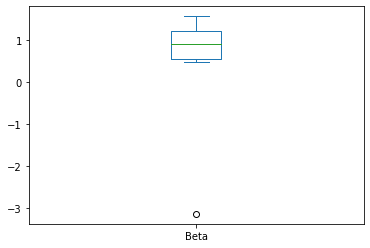

In [9]:
stocks["Beta"].plot.box()

**Pytanie 5:**

Poniżej przedstawiamy kilka danych o płacach i CPI – wskaźniku zakupów konsumenckich – w Rumunii w latach 2000-2010. [1]

*Oblicz roczną stopę procentową wzrostu płac i zaokrąglij wynik do jednego miejsca po przecinku.*

In [10]:
RomaniaCPIWages = pd.read_csv("https://raw.githubusercontent.com/ThomasJewson/datasets/master/CPIWagesInRomania/wage_cpi_yearly.csv")
RomaniaCPIWages

Year    Wage    CPI
0   2000   217.4  322.9
1   2001   305.3  239.0
2   2002   388.1  194.5
3   2003   486.8  168.6
4   2004   596.5  150.5
5   2005   737.8  138.2
6   2006   862.0  129.6
7   2007  1042.9  123.7
8   2008  1282.3  114.6
9   2009  1381.1  108.6
10  2010  1407.3  103.3

In [11]:
round(RomaniaCPIWages["Wage"].pct_change()*100,1)

0      NaN
1     40.4
2     27.1
3     25.4
4     22.5
5     23.7
6     16.8
7     21.0
8     23.0
9      7.7
10     1.9
Name: Wage, dtype: float64

Źródła:

[1] I. Dolca and M. Nicolov (2013). "Analysis of Relationship Between
Net Wage and Consumer Price Index," Procedia Economics and Finance, Vol. 6,
pp. 738-747.
